In [2]:
import numpy as np
import pandas as pd
#from ydata_profiling import ProfileReport
import os
import json

file_path = os.path.join("..", "air_berlin","2024-03_1h_mc010.json") # join because different os use either \ or / as file path seperators
df = pd.read_json(file_path)
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
# Select the relevant columns
#subset_df = df[['datetime', 'component', 'value']]

In [ ]:
#profile = ProfileReport(subset_df, title="Air march 2024 - wedding report")
#profile.to_widgets()

In [ ]:
#profile.to_file("air_march_2024_1h_mc010_report.html")

In [3]:
# Pivot the data to get components as columns
pivot_df = df.pivot(index='datetime', columns='component', values='value')
pivot_df.sample(3)

component                  no2_1h  no_1h  nox_1h  o3_1h  pm10_1h  pm2_1h
datetime                                                                
2024-03-04 11:00:00+01:00    12.0    4.0    18.0   36.0     50.0    41.0
2024-03-15 21:00:00+01:00    37.0    3.0    42.0   35.0     17.0    11.0
2024-03-07 15:00:00+01:00     9.0    2.0    12.0   78.0     27.0    21.0

In [4]:
correlation_matrix = pivot_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
component    no2_1h     no_1h    nox_1h     o3_1h   pm10_1h    pm2_1h
component                                                            
no2_1h     1.000000  0.554882  0.869003 -0.674248  0.227443  0.139560
no_1h      0.554882  1.000000  0.891327 -0.441612  0.098150  0.085260
nox_1h     0.869003  0.891327  1.000000 -0.621700  0.174177  0.116091
o3_1h     -0.674248 -0.441612 -0.621700  1.000000 -0.292780 -0.449346
pm10_1h    0.227443  0.098150  0.174177 -0.292780  1.000000  0.852927
pm2_1h     0.139560  0.085260  0.116091 -0.449346  0.852927  1.000000


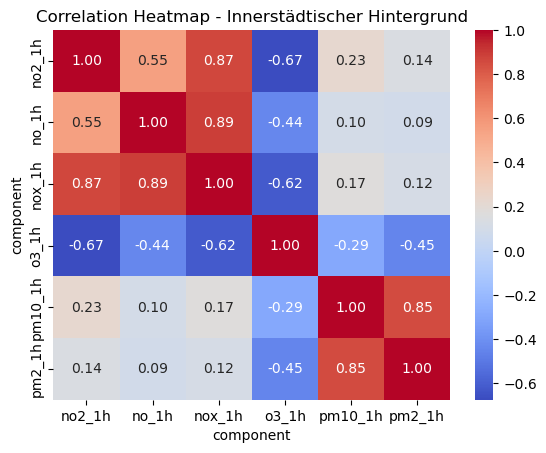

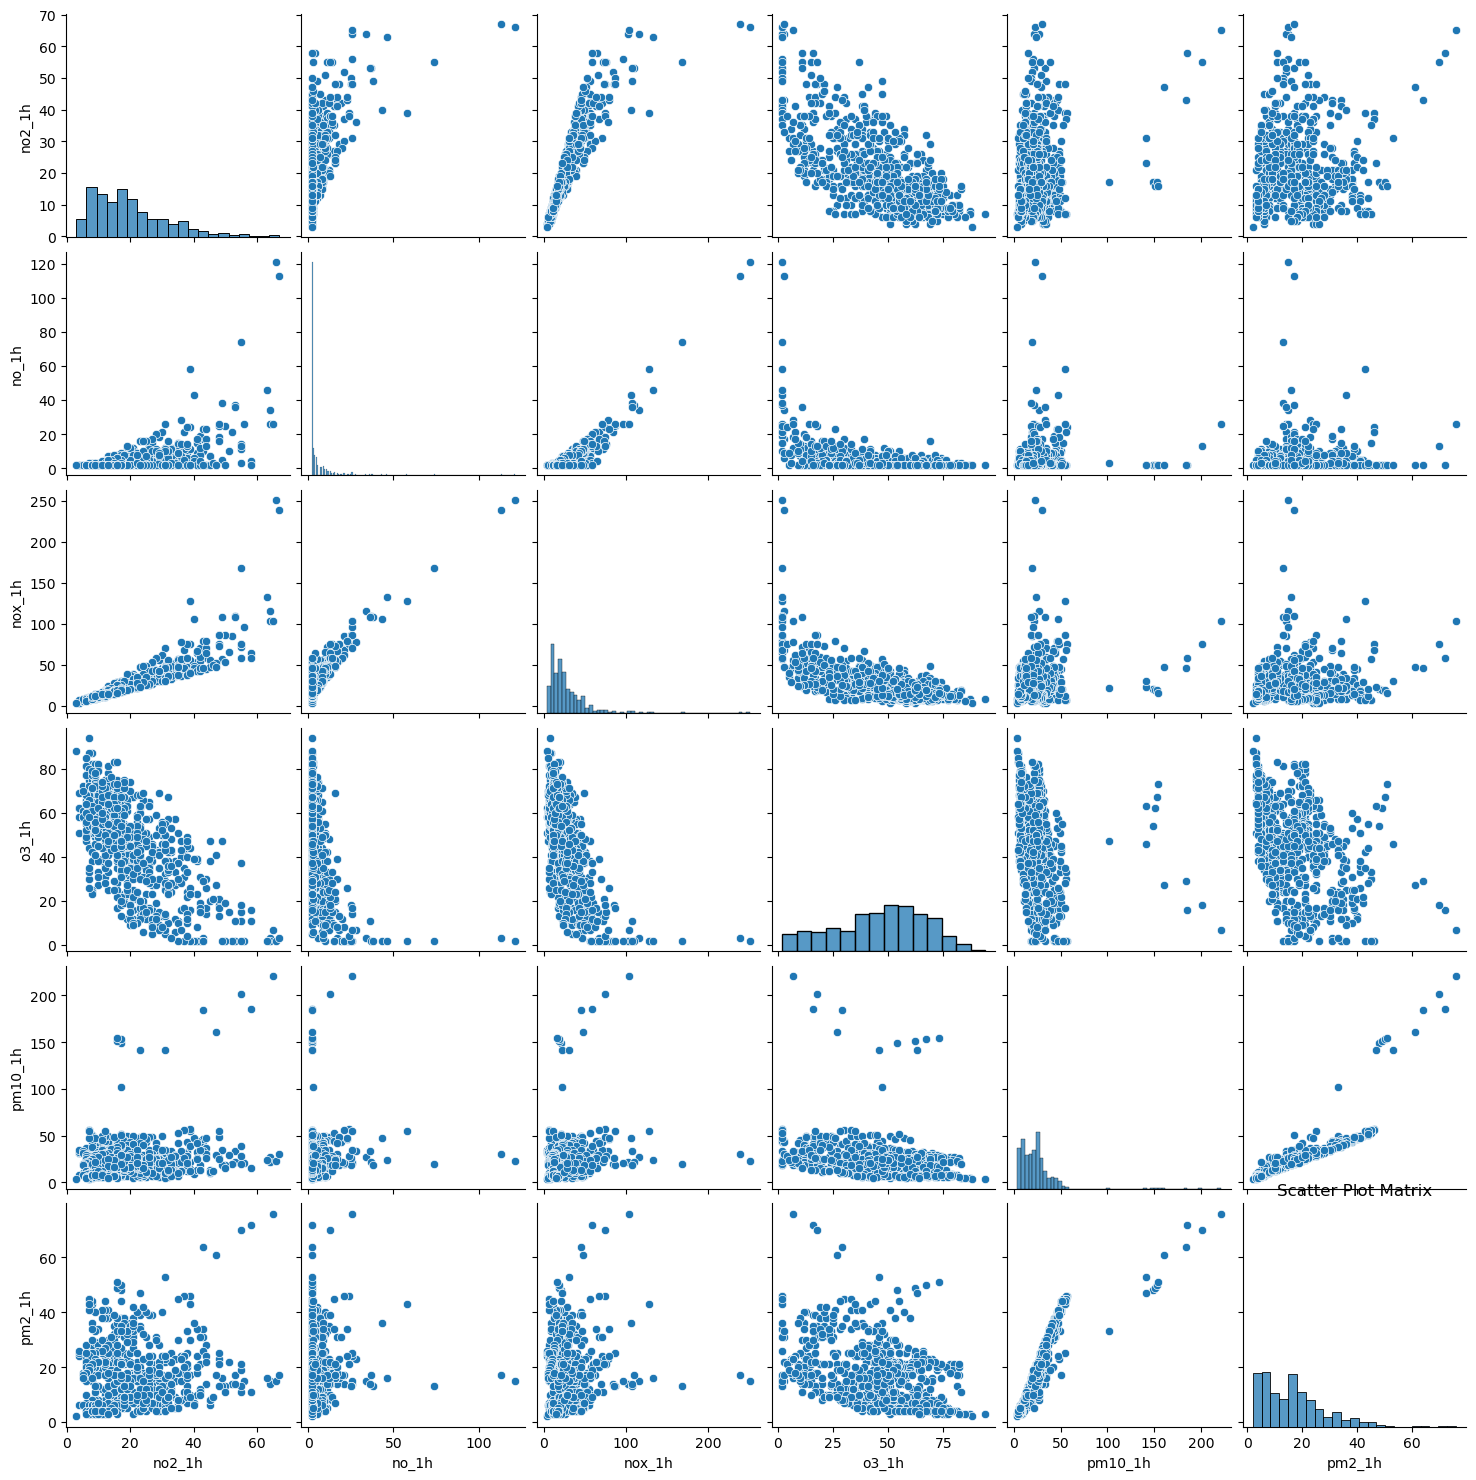

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Innerstädtischer Hintergrund")
plt.show()

# Create scatter plots to visualize relationships
sns.pairplot(pivot_df)
plt.title("Scatter Plot Matrix")
plt.show()

FAZIT:
Vorhersage von pm10 anhand von Luftpartikeln (außer pm2) nicht feasable, da es kaum Korrelationen gibt